In [9]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
%matplotlib inline

In [62]:
imread("DeWarp0.png").shape

(1918, 2557, 3)

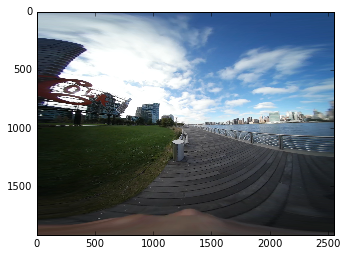

In [88]:
plt.imshow(imread("DeWarp0.png"))

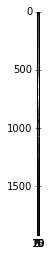

In [71]:
img1 = rgb2gray(imread("DeWarp0.png"))[:,2539:]
img2 = rgb2gray(imread("DeWarp1.png"))[:,:18]
plt.imshow(img1, cmap = 'gray')

In [72]:
img1.shape, img2.shape

((1918, 18), (1918, 18))

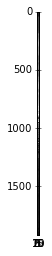

In [73]:
plt.imshow(img2, cmap = 'gray')

In [74]:
(rimg,param) =  RigidRegistration(img1,img2)
param

Optimization terminated successfully.
         Current function value: 434.148751
         Iterations: 39
         Function evaluations: 153


array([-8.4,  0. ])

Optimization terminated successfully.
         Current function value: 20839.239164
         Iterations: 76
         Function evaluations: 141


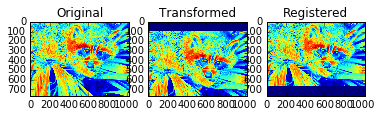

In [80]:
import numpy as np
from PIL import Image
from scipy import ndimage
from scipy import optimize
from scipy import misc

from pylab import *

def MeasureErr(img1,img2):
    diff = (img1-img2)
    return sum(diff**2)

def RigidRegistration(img,ximg):
    
    # Perform initial guess rotation & translation 
    v_range =  np.array(xrange(-10,10))
    
    err = np.array([MeasureErr(img,ndimage.shift(ximg,(v,0))) for v in v_range])
    x = v_range[where(err==err.min())[0]]
    
    err = np.array([MeasureErr(img,ndimage.shift(ximg,(0,v))) for v in v_range])
    y = v_range[where(err==err.min())[0]]

    # List contains displacement in x and y and rotation
    
    param = [x,y]
    
    def ErrFunc(param,img=img,ximg=ximg):
        
        # Perform rotational and translational transformation
        
        _img = ximg.copy()
        _img = ndimage.shift(_img,param[:2])
        
        return MeasureErr(img,_img)

    
    param = optimize.fmin(ErrFunc,param)
    
    #Final transformation
    _img = ximg.copy()
    _img = ndimage.shift(_img,param[:2])
    
    return (_img,param)

img = rgb2gray(misc.face())

# Normalize image (0-1)
img -= img.min() 
img /= img.max()

# Generate transformed image
ximg = img.copy()
ximg = ndimage.shift(ximg,(100,0))

(rimg,param) =  RigidRegistration(img,ximg)

 
figure(1)
clf()
subplot(1,3,1)
title('Original')
imshow(img)
subplot(1,3,2)
title('Transformed')
imshow(ximg)
subplot(1,3,3)
title('Registered')
imshow(rimg)
show()

In [81]:
param

array([ -9.99999875e+01,  -1.02207903e-05])

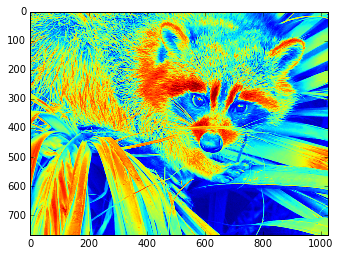

In [86]:
plt.imshow(img)

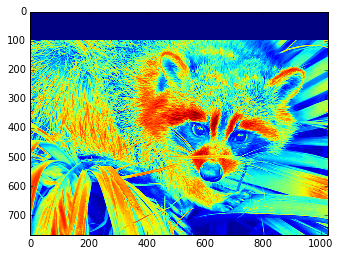

In [87]:
plt.imshow(ximg)

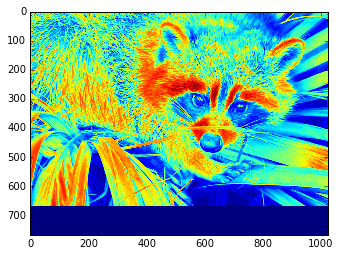

In [84]:
plt.imshow(rimg)